# Demo: Apply trained VCD-Net model  
This notebook demonstrates applying a VCD-Net  model for a light field reconstruction.


## Examine the parameters
We define all parameters in a [configuration script config.py](./config.py). Make the edit according to specific application and dataset before running this notebook.  

Typical parameters include:
- **PSF.n_slices** : number of z slices of targeted 3-D reconstruction
- **PSF.Nnum**     : number of pixels behind each lenslet
- **label**        : label of the pretrained model to be used for inference
- **VALID.lf2d_path**     : folder where the 2D light field images to be reconstructed are stored
- **VALID.saving_path**   : folder where the reconstruced results will be stored

In [1]:
from eval import *
import warnings
warnings.filterwarnings('ignore')

print("Parameters defined in config.py:")
print("PSF related: ")
for par, val in config.PSF.items():
    print('    {:<30}   {:<30}'.format(par,val))
        
print("Prediction related: ")
for par, val in config.VALID.items():
    print('    {:<30}   {:<30}'.format(par,val))



Parameters defined in config.py:
PSF related: 
    n_slices                         61                            
    Nnum                             11                            
Prediction related: 
    saving_path                      ../../results/VCD_tubulin_40x_n11_[m30-30]_step1um_xl9_num120_sparse/
    lf2d_path                        ../../data/to_predict/        
    ckpt_dir                         ../../data/checkpoint/tubulin_40x_n11_[m30-30]_step1um_xl9_num120_sparse/


## Use the VCD-Net to reconstruct the light field
This step will use the trained model to reconstruct the data in *VALID.lf2d_path* and store the output in *VALID.saving_path*. Currently this function only supports input images with same size if you want to process multiple files together.

Parameters include:
- ckpt : checkpoint to use. Set 0 to use the best checkpoint automatically.
- use_cpu : enable to use CPU. Otherwise it uses GPU (**not supported on this code ocean environment**).

Please try to restart the kernel if unpredicted errors occur. 

In [2]:
ckpt = 0
batch_size = 1
use_cpu = 1                                             
infer(ckpt, batch_size=batch_size, use_cpu=use_cpu)

[TL] [*] creates ../../results/VCD_tubulin_40x_n11_[m30-30]_step1um_xl9_num120_sparse/ ...


read 1 from ../../data/to_predict/





[TL] InputLayer  unet/lf_extra: (1, 59, 59, 121)
[TL] Conv2dLayer unet/conv1: shape:(7, 7, 121, 128) strides:(1, 1, 1, 1) pad:SAME act:identity



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


[TL] SubpixelConv2d  interp/subpixel0: scale: 2 n_out_channel: 32 act: identity
[TL] Conv2dLayer unet/interp/conv0: shape:(3, 3, 32, 64) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] SubpixelConv2d  interp/subpixel1: scale: 2 n_out_channel: 16 act: identity
[TL] Conv2dLayer unet/interp/conv1: shape:(3, 3, 16, 32) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] SubpixelConv2d  interp/subpixel2: scale: 2 n_out_channel: 8 act: identity
[TL] Conv2dLayer unet/interp/conv2: shape:(3, 3, 8, 16) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] SubpixelConv2d  interp/subpixel3: scale: 2 n_out_channel: 4 act: identity
[TL] Conv2dLayer unet/interp/conv3: shape:(3, 3, 4, 8) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] Conv2dLayer unet/interp/conv_final: shape:(3, 3, 8, 8) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] BatchNormLayer unet/interp/bn_final: decay:0.900000 epsilon:0.000010 act:identity is_train:True
[TL] Conv2dLayer unet/encoder/conv0: shape:(3, 3, 8, 64) strides:(1, 1, 1, 1) pad

encoder 0 : (1, 944, 944, 64)
(1, 944, 944, 64)
(1, 944, 944, 64) (1, 944, 944, 64)
encoder 1 : (1, 472, 472, 128)
(1, 472, 472, 128)
(1, 472, 472, 128) (1, 472, 472, 128)
encoder 2 : (1, 236, 236, 256)
(1, 236, 236, 256)
(1, 236, 236, 256) (1, 236, 236, 256)
encoder 3 : (1, 118, 118, 512)


[TL] BatchNormLayer unet/encoder/bn4: decay:0.900000 epsilon:0.000010 act:identity is_train:True
[TL] ElementwiseLayer unet/encoder/add4: size:(1, 118, 118, 512) fn:add
[TL] PoolLayer   unet/encoder/maxplool4: ksize:[1, 3, 3, 1] strides:[1, 2, 2, 1] padding:SAME pool:max_pool
[TL] Conv2dLayer unet/encoder/conv5: shape:(3, 3, 512, 512) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] BatchNormLayer unet/encoder/bn5: decay:0.900000 epsilon:0.000010 act:identity is_train:True
[TL] ElementwiseLayer unet/encoder/add5: size:(1, 59, 59, 512) fn:add
[TL] PoolLayer   unet/encoder/maxplool5: ksize:[1, 3, 3, 1] strides:[1, 2, 2, 1] padding:SAME pool:max_pool
[TL] UpSampling2dLayer upsamplimg: is_scale:False size:(59, 59) method:0 align_corners:False


(1, 118, 118, 512)
(1, 118, 118, 512) (1, 118, 118, 0)
encoder 4 : (1, 59, 59, 512)
(1, 59, 59, 512)
(1, 59, 59, 512) (1, 59, 59, 0)



[TL] ConcatLayer unet/decoder/concat1: axis: -1
[TL] Conv2dLayer unet/decoder/conv2: shape:(3, 3, 1024, 512) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] BatchNormLayer unet/decoder/bn2: decay:0.900000 epsilon:0.000010 act:identity is_train:True
[TL] UpSampling2dLayer upsamplimg2: is_scale:False size:(118, 118) method:0 align_corners:False
[TL] ConcatLayer unet/decoder/concat2: axis: -1
[TL] Conv2dLayer unet/decoder/conv3: shape:(3, 3, 1024, 512) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] BatchNormLayer unet/decoder/bn3: decay:0.900000 epsilon:0.000010 act:identity is_train:True


decoder 4 : (1, 59, 59, 512)
decoder 3 : (1, 118, 118, 512)


[TL] UpSampling2dLayer upsamplimg3: is_scale:False size:(236, 236) method:0 align_corners:False
[TL] ConcatLayer unet/decoder/concat3: axis: -1
[TL] Conv2dLayer unet/decoder/conv4: shape:(3, 3, 768, 256) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] BatchNormLayer unet/decoder/bn4: decay:0.900000 epsilon:0.000010 act:identity is_train:True
[TL] UpSampling2dLayer upsamplimg4: is_scale:False size:(472, 472) method:0 align_corners:False
[TL] ConcatLayer unet/decoder/concat4: axis: -1
[TL] Conv2dLayer unet/decoder/conv5: shape:(3, 3, 384, 128) strides:(1, 1, 1, 1) pad:SAME act:identity


decoder 2 : (1, 236, 236, 512)
decoder 1 : (1, 472, 472, 256)


[TL] BatchNormLayer unet/decoder/bn5: decay:0.900000 epsilon:0.000010 act:identity is_train:True
[TL] UpSampling2dLayer upsamplimg5: is_scale:False size:(944, 944) method:0 align_corners:False
[TL] ConcatLayer unet/decoder/concat5: axis: -1
[TL] Conv2dLayer unet/decoder/conv6: shape:(3, 3, 192, 61) strides:(1, 1, 1, 1) pad:SAME act:identity
[TL] BatchNormLayer unet/decoder/bn6: decay:0.900000 epsilon:0.000010 act:identity is_train:True
[TL] UpSampling2dLayer upsamplimg6: is_scale:False size:(944, 944) method:0 align_corners:False
[TL] UpSampling2dLayer resize_final: is_scale:False size:[649, 649] method:0 align_corners:False


decoder 0 : (1, 944, 944, 128)
loading ../../data/checkpoint/tubulin_40x_n11_[m30-30]_step1um_xl9_num120_sparse//vcdnet_best.npz


[TL] [*] Load ../../data/checkpoint/tubulin_40x_n11_[m30-30]_step1um_xl9_num120_sparse//vcdnet_best.npz SUCCESS!


time elapsed (sess.run): 15.7817s 
recon time elapsed (sess.run): 15.7817s 
saving results ... 
IO time elapsed (imwrite): 0.7698s 


## Plot the results

(649, 649, 61)


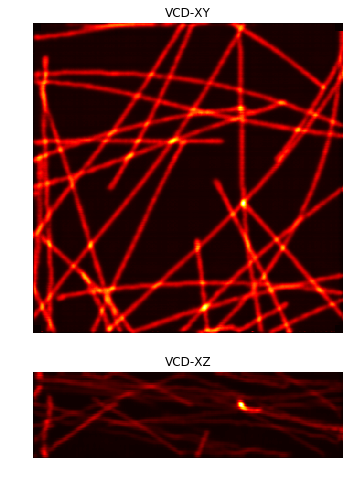

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec

test_file = 'vcd-tubulins3d_test.tif'
recon = get_and_rearrange3d(test_file, config.VALID.saving_path, normalize)
print(recon.shape)
plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[recon.shape[0],recon.shape[2]*1/0.34]) 
xy_view = plt.subplot(gs[0])
xy_view.imshow(np.sum(recon, axis=-1, keepdims=False),cmap='hot')
xy_view.set_title('VCD-XY')
plt.axis('off')
xz_view = plt.subplot(gs[1])
xz_view.imshow(np.transpose(np.sum(recon, axis=0, keepdims=False)),cmap='hot',aspect=1/0.34)
xz_view.set_title('VCD-XZ')
plt.axis('off')
plt.show()

## In the end

The result is stored in */results*. Once you shutdown this notebook and return to the code ocean, you can download the output file to examine it on your local machine. 